#### Convolutional Neural Network?
- A convolutional neural network is a feed-forward neural network that is generally used to analyze images by processing data with grid-like topology. - It’s also known as a ConvNet. A convolutional neural network is used to detect and classify objects in an image.
- It's primary feature is to detect and identify the features of images.
- In CNN, every image is represented in the form of an array of pixel values.

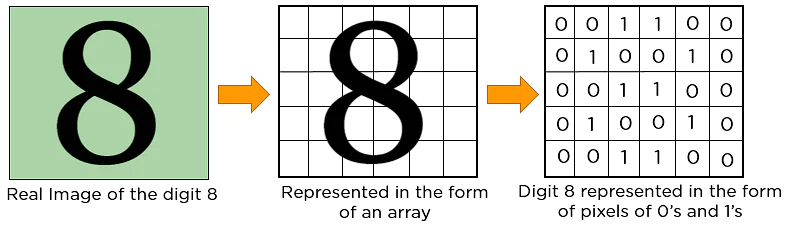

- The convolution operation forms the basis of any convolutional neural network. Let’s understand the convolution operation using two matrices, a and b, of 1 dimension.

- The convolution operation forms the basis of any convolutional neural network. Let’s understand the convolution operation using two matrices, a and b, of 1 dimension.

a = [5,3,7,5,9,7]

b = [1,2,3]

- In convolution operation, the arrays are multiplied element-wise, and the product is summed to create a new array, which represents a*b.

- The first three elements of the matrix a are multiplied with the elements of matrix b. The product is summed to get the result.

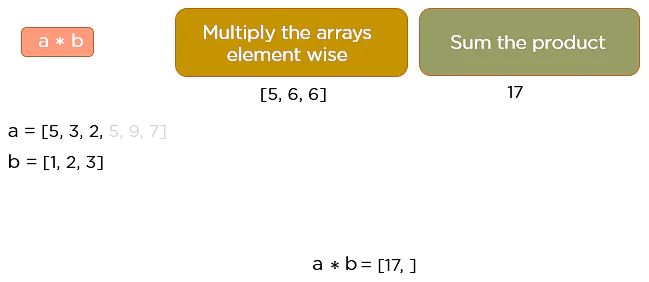

- The next three elements from the matrix a are multiplied by the elements in matrix b, and the product is summed up.

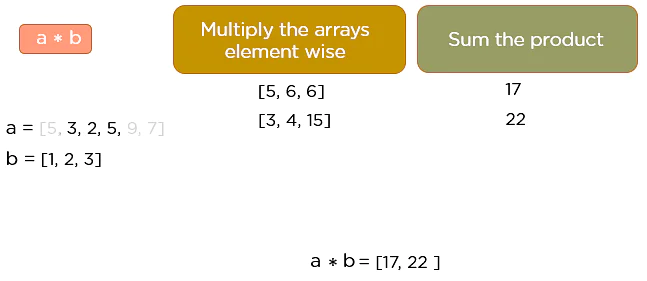

- This process continues until the convolution operation is complete.

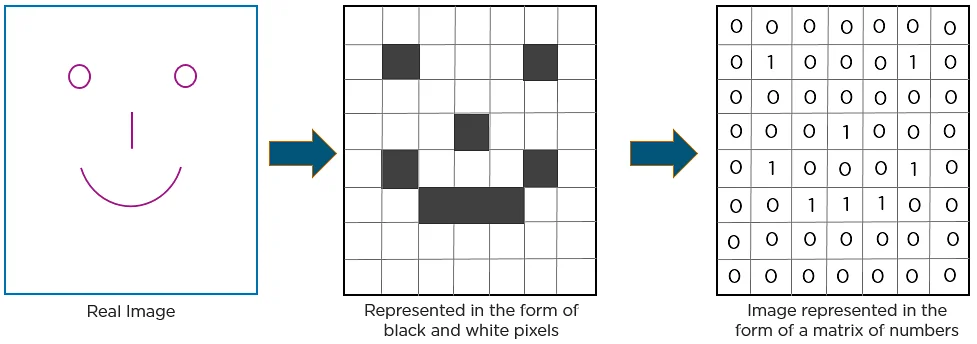

#### Layers in a Convolutional Neural Network
- A convolution neural network has multiple hidden layers that help in extracting information from an image. The four important layers in CNN are:

1. Convolution layer
2. ReLU layer
3. Pooling layer
4. Fully connected layer

`Convolution Layer`
- This is the first step in the process of extracting valuable features from an image. A convolution layer has several filters that perform the convolution operation. Every image is considered as a matrix of pixel values.

- Consider the following 5x5 image whose pixel values are either 0 or 1. There’s also a filter matrix with a dimension of 3x3. Slide the filter matrix over the image and compute the dot product to get the convolved feature matrix.

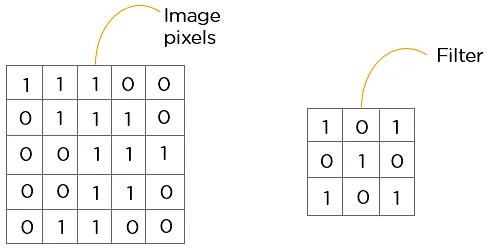

`ReLU layer`
- ReLU stands for the rectified linear unit. Once the feature maps are extracted, the next step is to move them to a ReLU layer. 

- ReLU performs an element-wise operation and sets all the negative pixels to 0. It introduces non-linearity to the network, and the generated output is a rectified feature map. Below is the graph of a ReLU function:


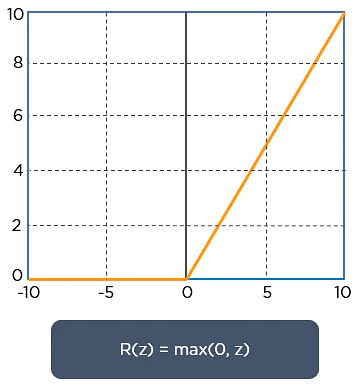


`Pooling Layer`

- Pooling is a down-sampling operation that reduces the dimensionality of the feature map. The rectified feature map now goes through a pooling layer to generate a pooled feature map.

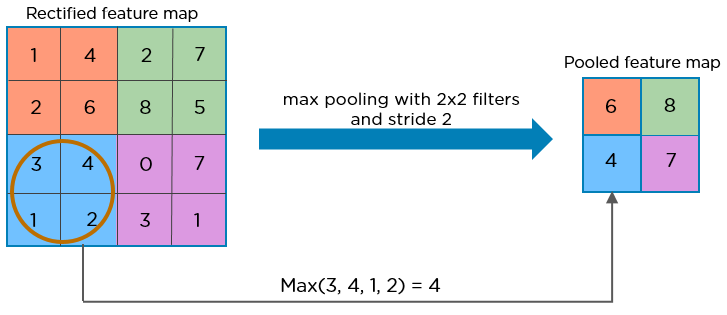

- The pooling layer uses various filters to identify different parts of the image like edges, corners, body, feathers, eyes, and beak.

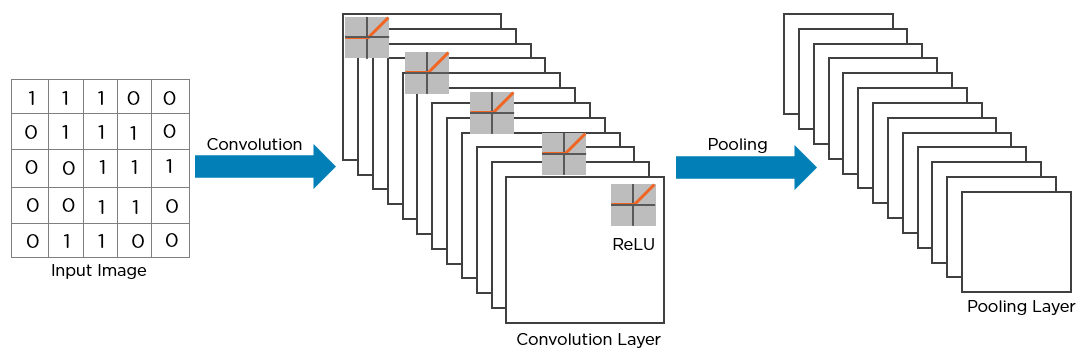

- The next step in the process is called flattening. Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector.

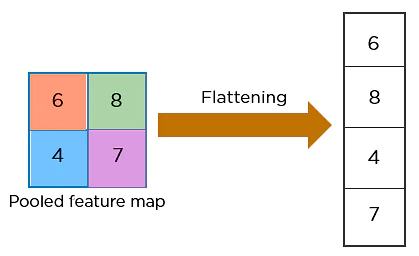

- The flattened matrix is fed as input to the fully connected layer to classify the image.

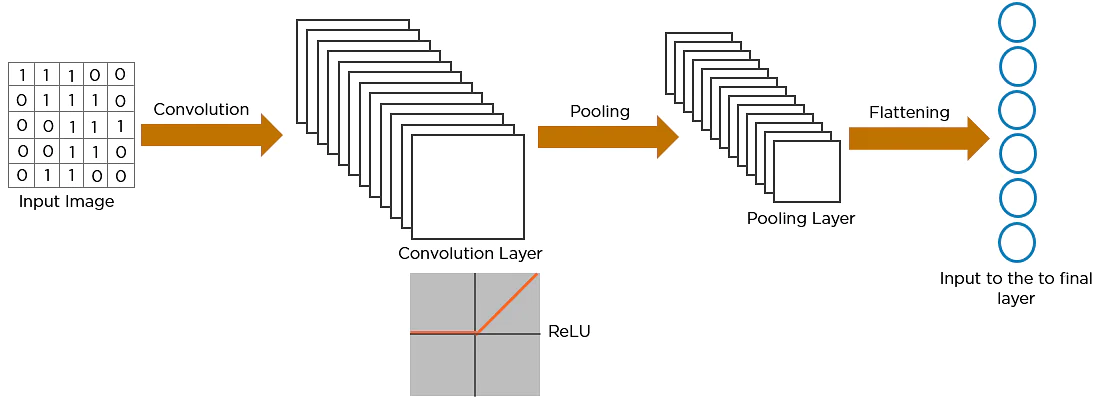

#### CNN image Feature Extraction

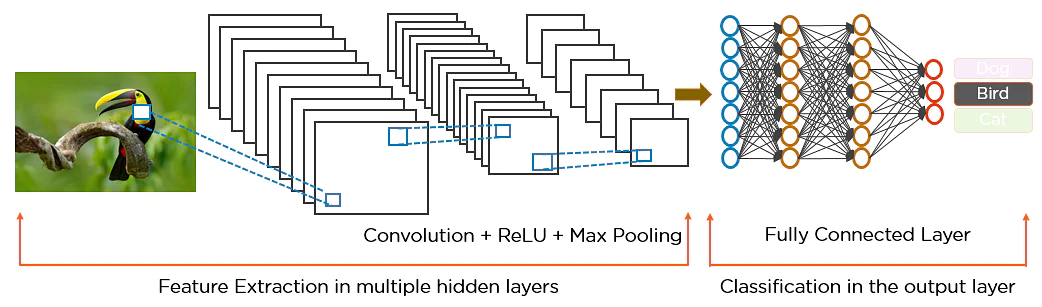

#### Python Code

In [1]:
import tensorflow

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.keras.datasets import mnist

In [9]:
import numpy as np

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Target class  9


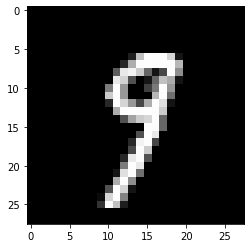

In [7]:
print('Target class ', y_train[43])
plt.imshow(X_train[43],cmap='gray')

- now we have mnist dataset wit 60000 training images with sape 28x28 size and 10000 testing images 
- all these images are grayscale it means that the deapth or channel of image is 1

 - Now, before bulding CNN model we have to first reshpe the image size with deapth so that our CNN model can understand
 - Second, we have to normalize the data to range of 0-1 
 - Third, we have to encode the target variable so that we can easily enterpret our mode

### Reshaping the images

In [10]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Normalizing the dataset 

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255  # for normalizing the image to range from 0 to 1
X_test /= 255

X_train[41]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### encoding the target variable 

In [12]:
y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes=10) 
y_test = tensorflow.keras.utils.to_categorical(y_test,num_classes=10)

### Creating the CNN Model 

- CNN model uses different approach to learn properties or images.
- actually, CNN models is work on principle of extracting the generic properites and specific properties.
- in the first layer it always tries to learn generic propeties from images and further it tries to earn specific properties.
- motivation behind cnn is that there is no not need of learning whole image beaucse images have speecial realtion which is local.
- CNN uses differnt predefined kernels/filters and pooling layers which extract useful and specific information from images.
- at last of cnn model it flatten the images and then uses a fully connected neural nets and output layer.

In [16]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=100,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
600/600 [==============================] - 76s 126ms/step - loss: 0.1312 - accuracy: 0.9601 - val_loss: 0.0457 - val_accuracy: 0.9852
Epoch 2/10
600/600 [==============================] - 75s 125ms/step - loss: 0.0372 - accuracy: 0.9880 - val_loss: 0.0381 - val_accuracy: 0.9868
Epoch 3/10
600/600 [==============================] - 76s 126ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0438 - val_accuracy: 0.9861
Epoch 4/10
600/600 [==============================] - 76s 127ms/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 0.0419 - val_accuracy: 0.9891
Epoch 5/10
600/600 [==============================] - 76s 127ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0459 - val_accuracy: 0.9880
Epoch 6/10
600/600 [==============================] - 76s 127ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.0506 - val_accuracy: 0.9866
Epoch 7/10
600/600 [==============================] - 76s 127ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0641 - val_ac

In [19]:
print(model.evaluate(X_train,y_train))
print(model.evaluate(X_test,y_test))

1875/1875 [==============================] - 22s 11ms/step - loss: 0.0027 - accuracy: 0.9991
[0.0026785461232066154, 0.9991333484649658]
313/313 [==============================] - 4s 12ms/step - loss: 0.0507 - accuracy: 0.9886
[0.05066123232245445, 0.9886000156402588]


### Saving model architecture and model weights so that we can use this pretrained model for future use
- Usually we perform transfer learning by using this cnn mnist model on google streen view dataset 

In [18]:
model.save('cnn_mnist_model.h5')
model.save_weights('cnn_mnist_weights.h5')